# capstone-stonerogers
Capstone Project for M.S. Data Analytics Program

Melissa Stone Rogers, [GitHub](https://github.com/meldstonerogers/capstone-stonerogers), April 3, 2025

## Introduction 
This is a professional project exaiming trends in suicide rates over time. Data has been gathered from Center for Disease Control using
the Web-based Injury Statistics Query and Reporting System [(WISQARS)](https://wisqars.cdc.gov/about/fatal-injury-data/). 

Commands were used on a Mac machine running zsh.

## Import Dependencies 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import seaborn as sns 
import seaborn.objects as so

## Data Acquisition

In [14]:
# Load dataset into a pandas DataFrame. 
df = pd.read_csv('data/wonder_suicide_data.csv')

# Display and inspect first rows of the DataFrame
print(df.head())

     state  state_code age_group_years  sex   race  race_code  year  deaths  \
0  Alabama           1           20-24    1  White          4  2018      10   
1  Alabama           1           20-24    1  White          4  2020      12   
2  Alabama           1           25-29    1  White          4  2018      14   
3  Alabama           1           25-29    1  White          4  2020      10   
4  Alabama           1           30-34    1  White          4  2022      11   

   population  
0      101325  
1      102201  
2      108640  
3      105338  
4      110606  


## Initial Data Inspection

In [15]:
print(df.head(10))
print(df.shape)
print(df.dtypes)

     state  state_code age_group_years  sex   race  race_code  year  deaths  \
0  Alabama           1           20-24    1  White          4  2018      10   
1  Alabama           1           20-24    1  White          4  2020      12   
2  Alabama           1           25-29    1  White          4  2018      14   
3  Alabama           1           25-29    1  White          4  2020      10   
4  Alabama           1           30-34    1  White          4  2022      11   
5  Alabama           1           30-34    1  White          4  2023      14   
6  Alabama           1           35-39    1  White          4  2018      20   
7  Alabama           1           35-39    1  White          4  2019      19   
8  Alabama           1           35-39    1  White          4  2020      15   
9  Alabama           1           35-39    1  White          4  2022      10   

   population  
0      101325  
1      102201  
2      108640  
3      105338  
4      110606  
5      111972  
6      102106  
7 

## Initial Data Transformation and Feature Engineering

In [79]:
# Replace age ranges with the starting age as integers
df['age_group_years'] = df['age_group_years'].replace({
    '10-14': 10,
    '15-19': 15,
    '20-24': 20,
    '25-29': 25,
    '30-34': 30,
    '35-39': 35,
    '40-44': 40,
    '45-49': 45,
    '50-54': 50,
    '55-59': 55,
    '60-64': 60,
    '65-69': 65,
    '70-74': 70,
    '75-79': 75,
    '80-84': 80
}).astype(int) 


## Initial Descriptive Statistics 

In [85]:
print(df.describe())
print(df.dtypes)

        state_code  age_group_years          sex    race_code         year  \
count  7106.000000      7106.000000  7106.000000  7106.000000  7106.000000   
mean     28.521531        43.985364     1.699690     3.756966  2020.952857   
std      15.742229        18.719322     0.458425     0.712340     1.969121   
min       1.000000        10.000000     1.000000     1.000000  2018.000000   
25%      16.000000        30.000000     1.000000     4.000000  2019.000000   
50%      28.000000        45.000000     2.000000     4.000000  2021.000000   
75%      41.000000        60.000000     2.000000     4.000000  2023.000000   
max      56.000000        80.000000     2.000000     5.000000  2024.000000   

            deaths    population  
count  7106.000000  7.106000e+03  
mean     38.017309  1.868834e+05  
std      38.708239  1.804688e+05  
min      10.000000  3.389000e+03  
25%      15.000000  7.532650e+04  
50%      24.000000  1.377875e+05  
75%      47.000000  2.102642e+05  
max     324.00000

## Initial Data Distributions

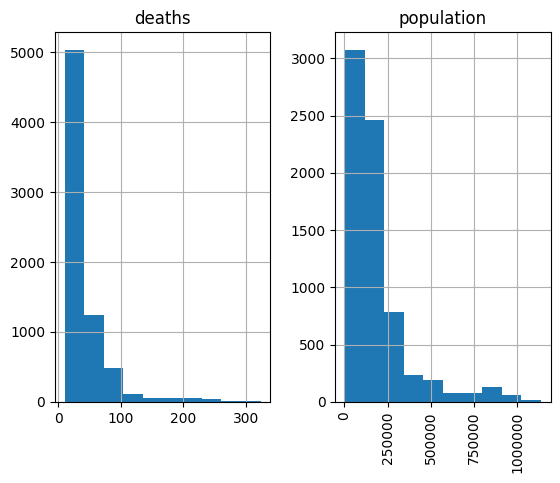

In [86]:
# Inspect histogram by numerical column
df.hist(column=['deaths', 'population'])

# Show all plots
plt.ticklabel_format(style='plain')
plt.xticks(rotation=90)
plt.show()

## Initial Data Distribution for Categorical Features

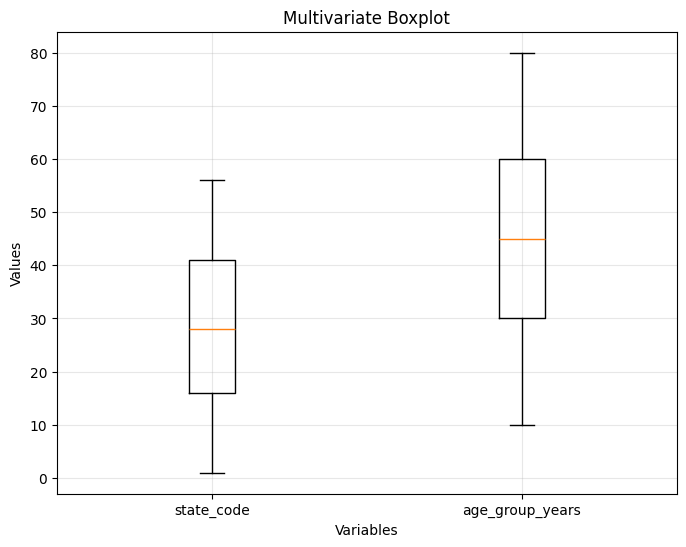

In [99]:
# Select specific columns to include in the box plot
selected_columns = ['state_code', 'age_group_years']  
subset_data = df[selected_columns]

# Create the boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(subset_data.values, tick_labels=selected_columns)  

# Add labels and title
plt.xlabel('Variables')
plt.ylabel('Values')
plt.title('Multivariate Boxplot')

# Show the plot
plt.grid(True, alpha=0.3)
plt.show()



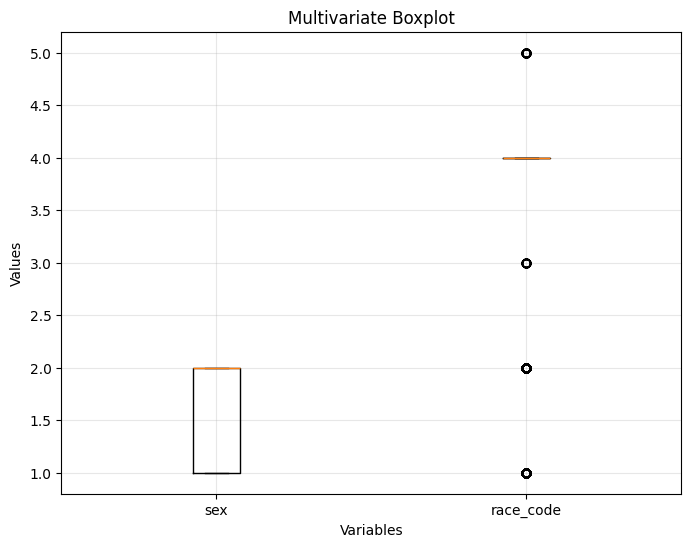

In [100]:
# Select specific columns to include in the box plot
selected_columns = ['sex', 'race_code']  
subset_data = df[selected_columns]

# Create the boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(subset_data.values, tick_labels=selected_columns)  

# Add labels and title
plt.xlabel('Variables')
plt.ylabel('Values')
plt.title('Multivariate Boxplot')

# Show the plot
plt.grid(True, alpha=0.3)
plt.show()

## Initial Visualizations & Discussion

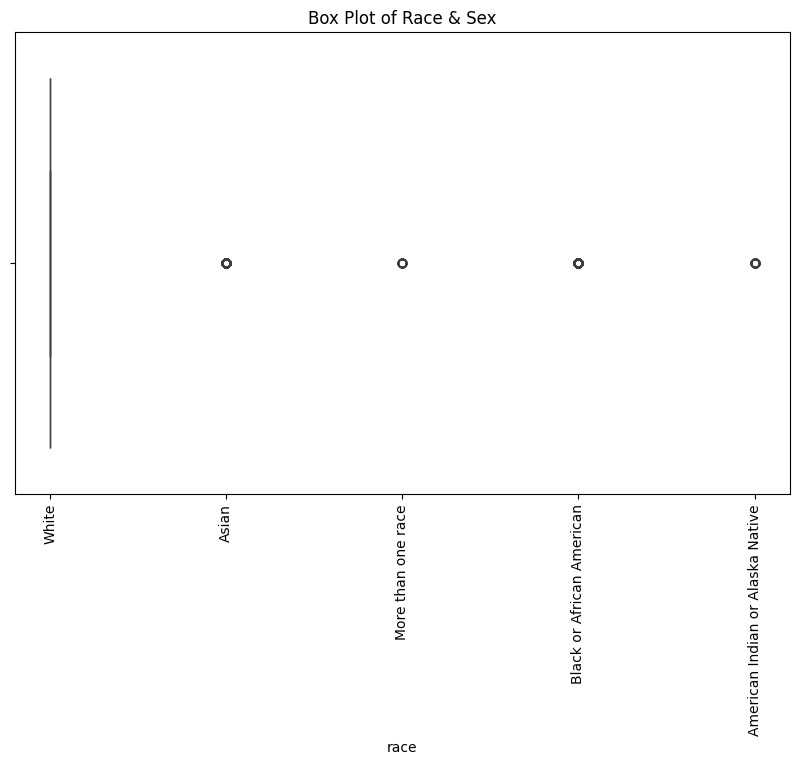

In [101]:
# Create a box plot to depict outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['race'])

# Set the title and labels
plt.xticks(rotation=90)
plt.title('Box Plot of Race & Sex')
plt.xlabel('race')

# Show the plot
plt.show()

In [102]:
# Create a box plot to depict outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="years_pll", y="sex")

# Set the title and labels
plt.xticks(rotation=90)
plt.title('Box Plot of Sex & Potential Life Lost ')
plt.xlabel('years of potential life lost')

# Show the plot
plt.show()

ValueError: Could not interpret value `years_pll` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

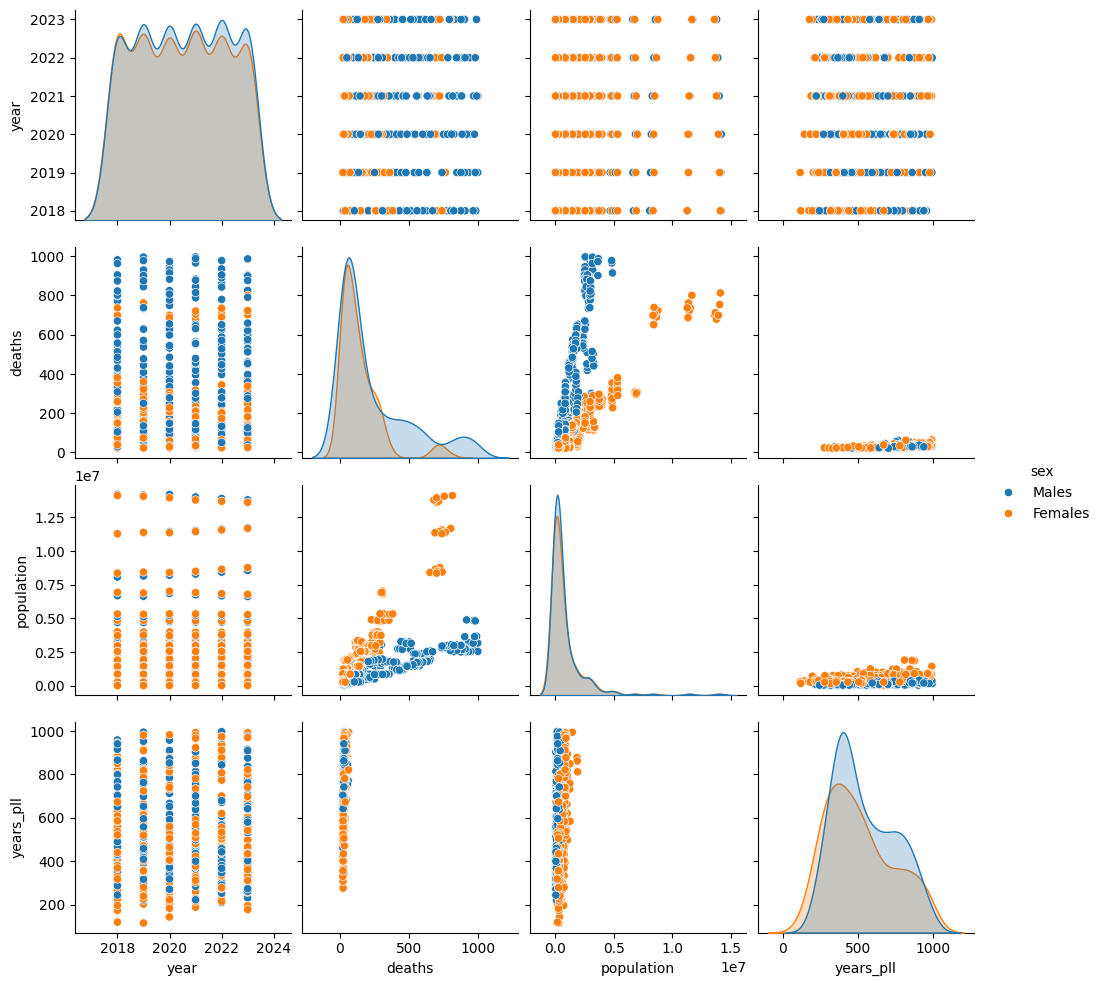

In [ ]:
sns.pairplot(df, hue="sex")